<a href="https://colab.research.google.com/github/Shriyatha/Named_Entity_Recognition/blob/main/BERT_TELUGU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# BERT-based Named Entity Recognition (NER) on CoNLL-2003 Dataset
!pip install transformers datasets evaluate seqeval torch tqdm matplotlib pandas seaborn -q

Using device: cuda

==== Data Loading and Exploration ====
Loading Telugu WikiANN dataset...

Dataset splits:
- validation: 1000 examples
- test: 1000 examples
- train: 1000 examples

Dataset features: {'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None), 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'spans': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

NER Tags:
0: O      - Outside of a named entity
1: B-PER  - Beginning of person name
2: I-PER  - Inside of person name
3: B-ORG  - Beginning of organization name
4: I-ORG  - Inside of organization name
5: B-LOC  - Beginning of location name
6: I-LOC  - Inside of location name

Tag distribution in training set:
- O     : 5,834 tokens
- I-ORG : 568 tokens
- B-LOC : 493 tokens
- B-PER : 364 tokens
- B-ORG : 347 tokens
-

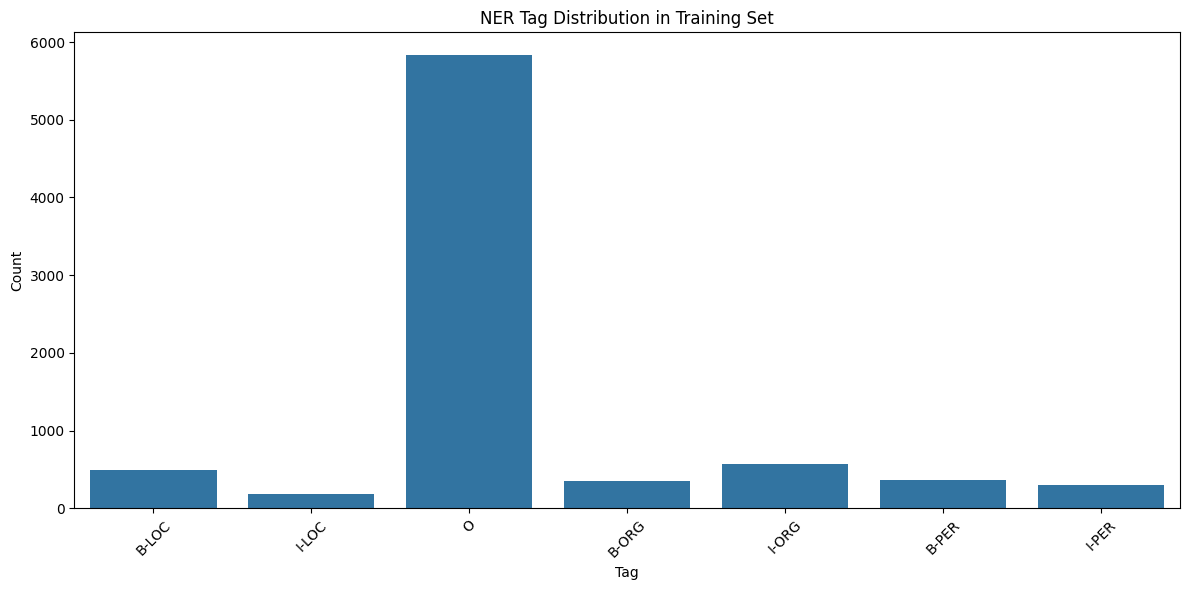


Example from training set:
ప్యూర్టోరికన్                  -> B-ORG
ఇండిపెండెన్స్                  -> I-ORG
పార్టీ                         -> I-ORG
స్వాతంత్ర్యం                   -> O
కోసం                           -> O
ప్రయత్నించింది                 -> O
.                              -> O
...

==== Data Preprocessing ====
Tokenizing dataset...


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Tokenization completed in 0.90 seconds

==== Model Setup ====
Using batch size: 16

Initializing multilingual BERT model for token classification...


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model architecture:
BertForTokenClassification
Total parameters: 177,268,231
Trainable parameters: 177,268,231
Non-trainable parameters: 0

==== Training Setup ====
Learning rate: 2e-05
Epochs: 5
Weight decay: 0.01
Warmup steps: 0

==== Training Loop ====

Starting training...


Epoch 1/5 [Training]:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 1/5 [Validation]:   0%|          | 0/63 [00:00<?, ?it/s]


Epoch 1/5 completed in 30.57 seconds
Training Loss: 0.6082
Validation F1: 0.6611
Validation Precision: 0.6579
Validation Recall: 0.6644


Epoch 2/5 [Training]:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 2/5 [Validation]:   0%|          | 0/63 [00:00<?, ?it/s]


Epoch 2/5 completed in 31.64 seconds
Training Loss: 0.2376
Validation F1: 0.7502
Validation Precision: 0.7268
Validation Recall: 0.7752


Epoch 3/5 [Training]:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 3/5 [Validation]:   0%|          | 0/63 [00:00<?, ?it/s]


Epoch 3/5 completed in 30.66 seconds
Training Loss: 0.1421
Validation F1: 0.7662
Validation Precision: 0.7322
Validation Recall: 0.8035


Epoch 4/5 [Training]:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 4/5 [Validation]:   0%|          | 0/63 [00:00<?, ?it/s]


Epoch 4/5 completed in 30.88 seconds
Training Loss: 0.0936
Validation F1: 0.7721
Validation Precision: 0.7452
Validation Recall: 0.8010


Epoch 5/5 [Training]:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 5/5 [Validation]:   0%|          | 0/63 [00:00<?, ?it/s]


Epoch 5/5 completed in 31.01 seconds
Training Loss: 0.0713
Validation F1: 0.7778
Validation Precision: 0.7516
Validation Recall: 0.8060

Training completed in 154.77 seconds (2.58 minutes)
Model saved to results/telugu_ner_model


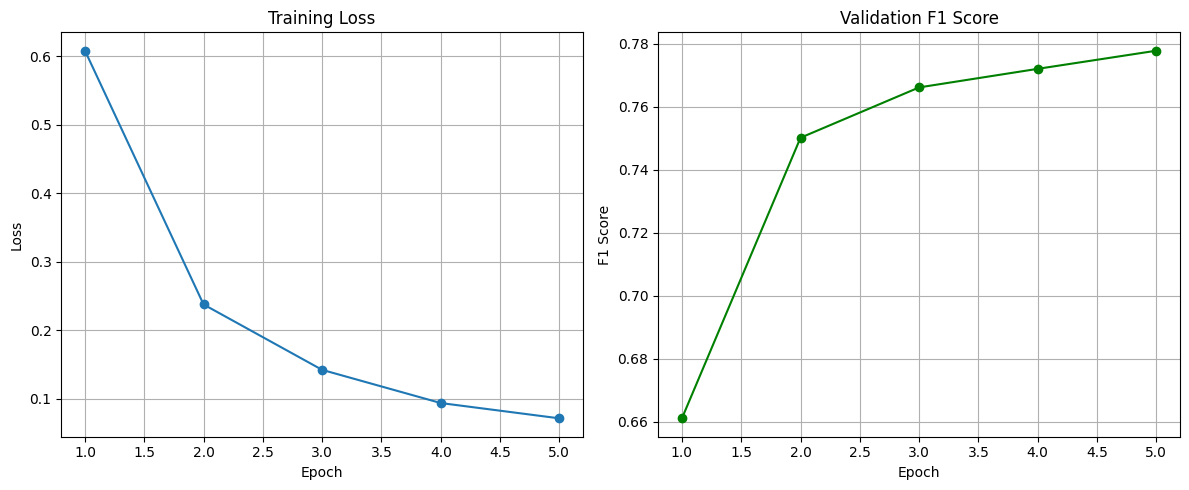


==== Test Evaluation and Analysis ====
Evaluating on test set...


Testing:   0%|          | 0/63 [00:00<?, ?it/s]


Test Results:
Accuracy: 0.9372
Precision: 0.7433
Recall: 0.8010
F1 Score: 0.7711

Per-Entity Type Metrics:
LOC:
 Precision: 0.7654
 Recall: 0.8556
 F1: 0.8080
 Support: 450 entities
ORG:
 Precision: 0.6834
 Recall: 0.6794
 F1: 0.6814
 Support: 340 entities
PER:
 Precision: 0.7648
 Recall: 0.8451
 F1: 0.8030
 Support: 381 entities


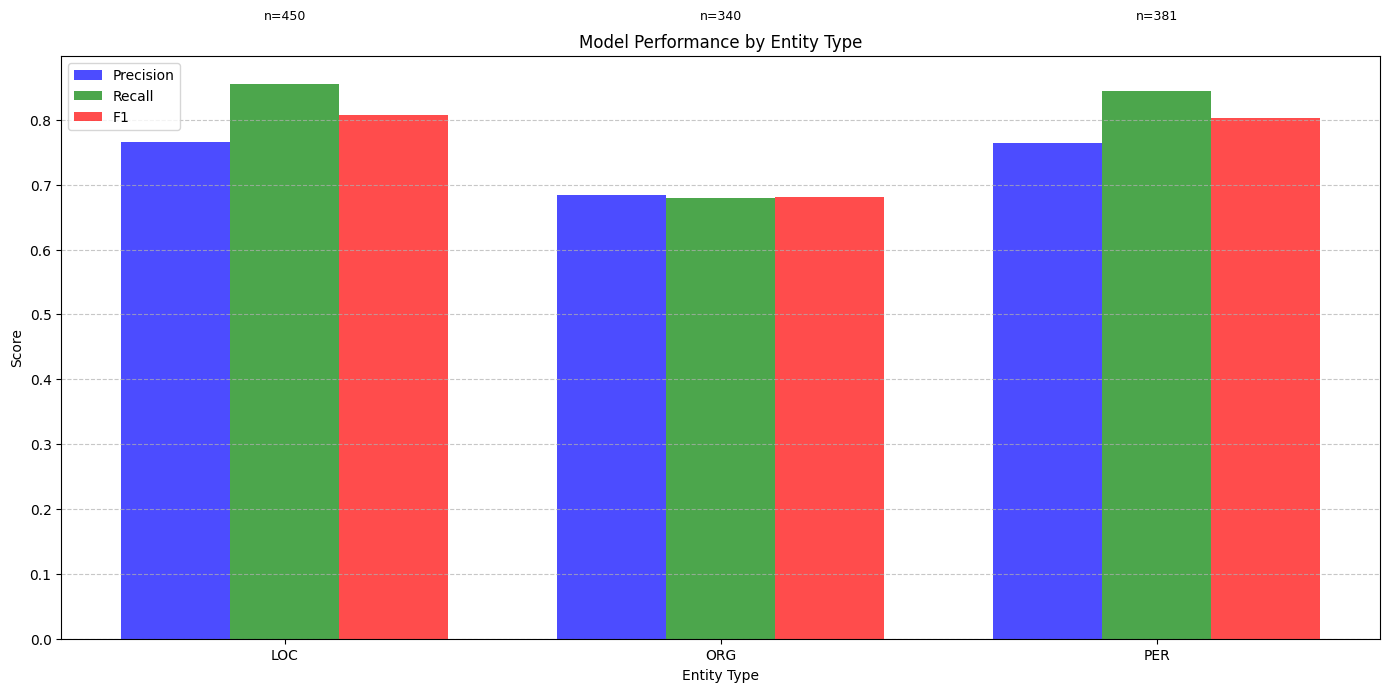


==== Error Analysis ====



Found 295 examples with misclassifications

Most common error types:
TRUE: O      -> PRED: B-LOC : 47 occurrences
 Example tokens: మ, చ, బ
TRUE: O      -> PRED: I-ORG : 39 occurrences
 Example tokens: ప, ప, న
TRUE: I-ORG  -> PRED: O     : 37 occurrences
 Example tokens: ఘ, కు, జ
TRUE: B-ORG  -> PRED: B-PER : 36 occurrences
 Example tokens: క, ర, చ
TRUE: O      -> PRED: B-PER : 34 occurrences
 Example tokens: గ, క, ఎ
TRUE: O      -> PRED: B-ORG : 30 occurrences
 Example tokens: జ, ఐ, జ
TRUE: I-ORG  -> PRED: I-PER : 28 occurrences
 Example tokens: ర, స, న
TRUE: B-ORG  -> PRED: B-LOC : 27 occurrences
 Example tokens: అ, స, గ
TRUE: B-ORG  -> PRED: O     : 26 occurrences
 Example tokens: త, ప, క
TRUE: O      -> PRED: I-LOC : 22 occurrences
 Example tokens: స, రాష్ట్రం, మండలం


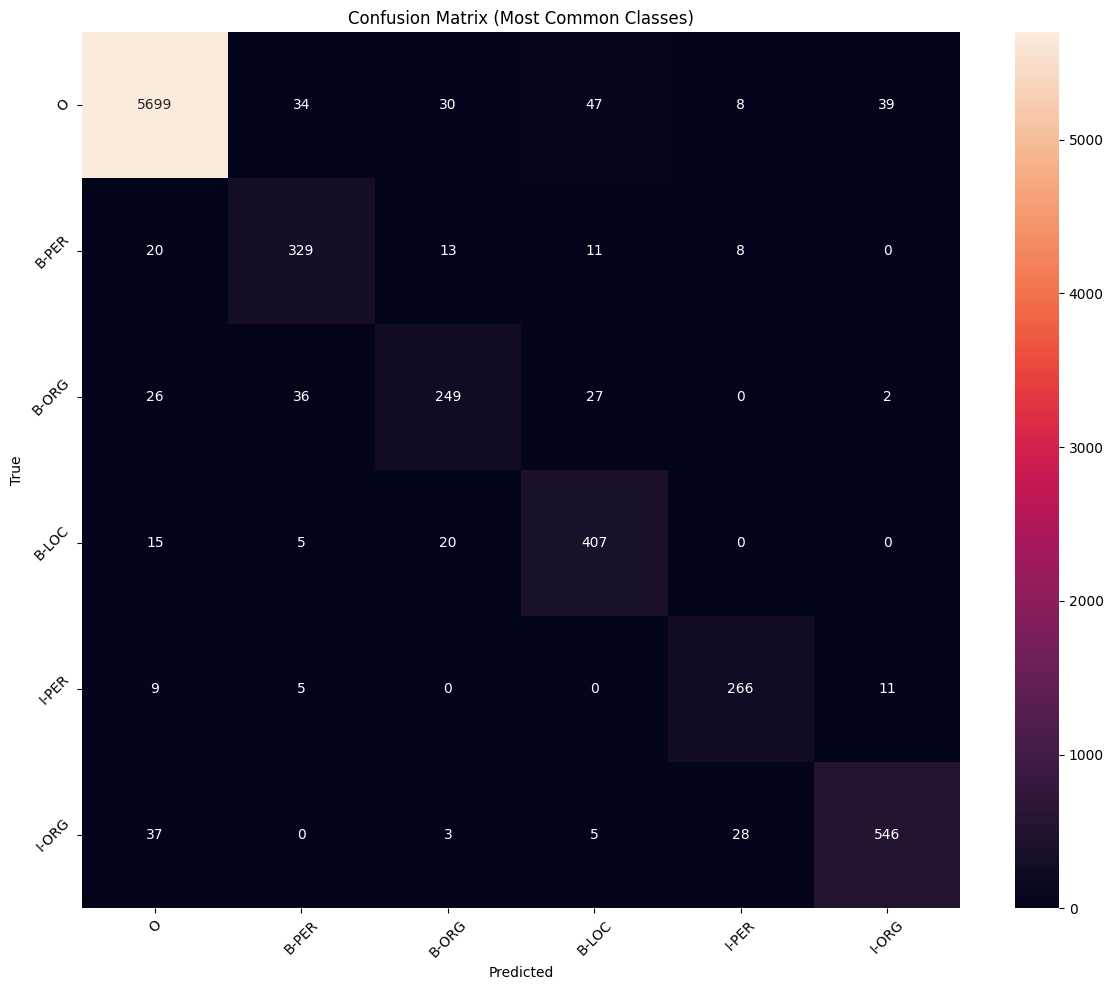


Examples of tokens predicted as entities but are not:
TRUE: O -> PRED: B-ORG:
 Tokens: జ, ఐ, జ, వ, శ
TRUE: O -> PRED: I-ORG:
 Tokens: ప, ప, న, క, న
TRUE: O -> PRED: B-LOC:
 Tokens: మ, చ, బ, ఆంధ్ర, మ

Examples of entities missed (predicted as 'O'):
TRUE: B-LOC -> PRED: O:
 Tokens: బ, ఊ, గ, ప, న
TRUE: B-ORG -> PRED: O:
 Tokens: త, ప, క, క, 2014
TRUE: I-ORG -> PRED: O:
 Tokens: ఘ, కు, జ, [UNK], వ

Examples of entity type confusion:
TRUE: B-ORG -> PRED: B-LOC:
 Tokens: అ, స, గ, హ, అ
TRUE: I-ORG -> PRED: I-LOC:
 Tokens: జిల్లా, జిల్లా, (, ర, )
TRUE: B-ORG -> PRED: B-PER:
 Tokens: క, ర, చ, న, సి

==== Model Performance Analysis ====
Analyzing performance by token length:


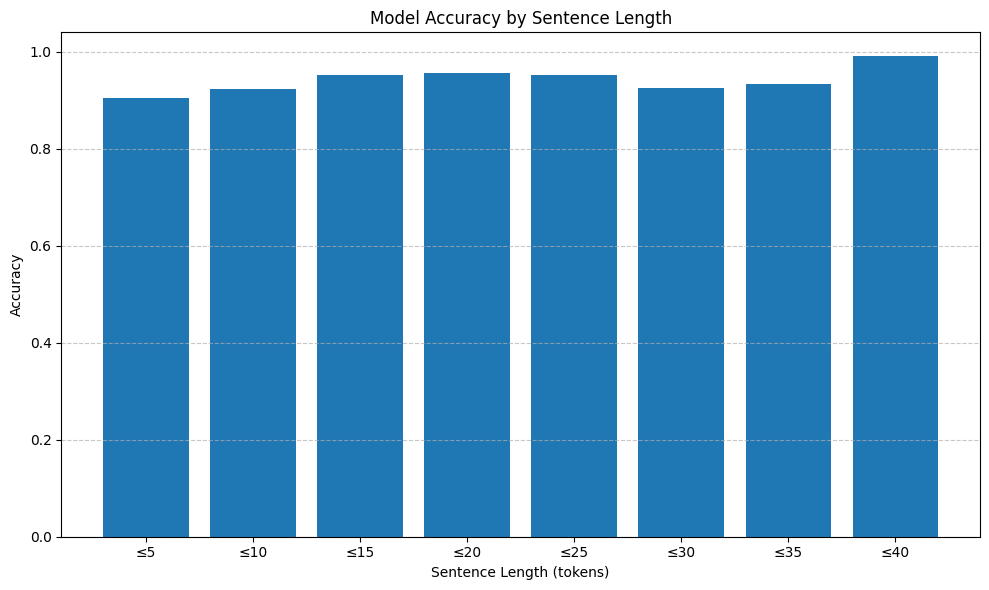


Analyzing entity boundary detection:
Entity boundary errors:
- B->I: 13 occurrences
- I->B: 14 occurrences
- entity->O: 120 occurrences
- O->entity: 180 occurrences


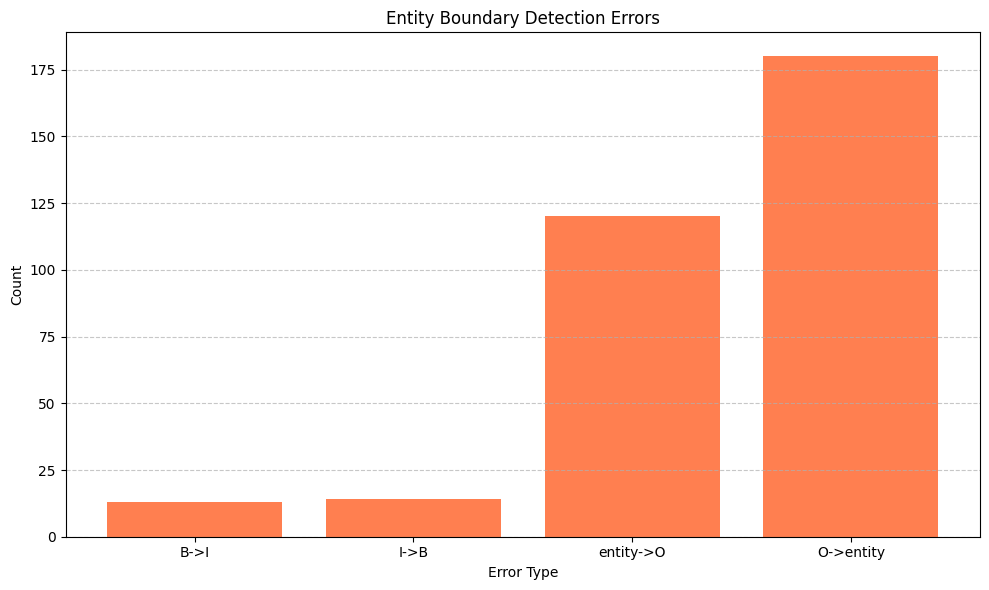


Results saved to the 'results' directory
Summary report generated at: results/summary_report.txt


In [3]:
import torch
from torch.utils.data import DataLoader
from transformers import (
    BertTokenizerFast,
    BertForTokenClassification,
    DataCollatorForTokenClassification,
    get_linear_schedule_with_warmup
)
from torch.optim import AdamW
from datasets import load_dataset
from evaluate import load
import numpy as np
from tqdm.notebook import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import time
import os

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# @title 1. Data Loading and Exploration

print("\n==== Data Loading and Exploration ====")

# Load Telugu WikiANN dataset
print("Loading Telugu WikiANN dataset...")
dataset = load_dataset("wikiann", "te")
metric = load("seqeval")

# Basic dataset info
print("\nDataset splits:")
for split in dataset.keys():
    print(f"- {split}: {dataset[split].num_rows} examples")

# Examine data structure
print("\nDataset features:", dataset["train"].features)

# Get NER tag names and their meanings
label_list = dataset["train"].features["ner_tags"].feature.names
label_meanings = {
    "O": "Outside of a named entity",
    "B-PER": "Beginning of person name",
    "I-PER": "Inside of person name",
    "B-ORG": "Beginning of organization name",
    "I-ORG": "Inside of organization name",
    "B-LOC": "Beginning of location name",
    "I-LOC": "Inside of location name"
}

print("\nNER Tags:")
for i, label in enumerate(label_list):
    meaning = label_meanings.get(label, "")
    print(f"{i}: {label:<6} - {meaning}")

# Check class distribution
tag_counts = defaultdict(int)
for example in dataset["train"]:
    for tag in example["ner_tags"]:
        tag_counts[label_list[tag]] += 1

print("\nTag distribution in training set:")
for tag, count in sorted(tag_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"- {tag:<6}: {count:,} tokens")

# @title Visualize Tag Distribution

# Plot tag distribution
plt.figure(figsize=(12, 6))
tags = list(tag_counts.keys())
counts = list(tag_counts.values())
sns.barplot(x=tags, y=counts)
plt.title("NER Tag Distribution in Training Set")
plt.ylabel("Count")
plt.xlabel("Tag")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display an example
print("\nExample from training set:")
example_idx = 42
example = dataset["train"][example_idx]
for token, tag_idx in zip(example["tokens"][:20], example["ner_tags"][:20]):
    print(f"{token:<30} -> {label_list[tag_idx]}")
print("...")

# @title 2. Data Preprocessing

print("\n==== Data Preprocessing ====")

# Initialize tokenizer (for Telugu, we'll use multilingual BERT)
tokenizer = BertTokenizerFast.from_pretrained("bert-base-multilingual-cased")

# Preprocess function to align labels with tokens
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"],
        truncation=True,
        is_split_into_words=True,
        padding="max_length",
        max_length=128,
        return_tensors="pt"
    )

    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)  # Special tokens get -100
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])  # First token of word
            else:
                label_ids.append(-100)  # Subsequent tokens of word get -100
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

print("Tokenizing dataset...")
start_time = time.time()

# Tokenize dataset
tokenized_datasets = dataset.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=dataset["train"].column_names
)

tokenization_time = time.time() - start_time
print(f"Tokenization completed in {tokenization_time:.2f} seconds")

# @title 3. Model Setup

print("\n==== Model Setup ====")

# Create data collator
data_collator = DataCollatorForTokenClassification(tokenizer)

# Create DataLoaders
batch_size = 16
print(f"Using batch size: {batch_size}")

train_dataloader = DataLoader(
    tokenized_datasets["train"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=batch_size
)

val_dataloader = DataLoader(
    tokenized_datasets["validation"],
    collate_fn=data_collator,
    batch_size=batch_size
)

test_dataloader = DataLoader(
    tokenized_datasets["test"],
    collate_fn=data_collator,
    batch_size=batch_size
)

# Initialize multilingual BERT model for token classification
print("\nInitializing multilingual BERT model for token classification...")
model = BertForTokenClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(label_list),
    id2label={i: label for i, label in enumerate(label_list)},
    label2id={label: i for i, label in enumerate(label_list)}
).to(device)

# Print model architecture
print("\nModel architecture:")
print(model.__class__.__name__)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Non-trainable parameters: {total_params - trainable_params:,}")

# Helper function to extract entities
def extract_entities(tokens, tags):
    """Extract entities from tokens and tags"""
    entities = defaultdict(list)
    current_entity = []
    current_type = None

    for token, tag in zip(tokens, tags):
        if tag.startswith('B-'):
            # End previous entity if there was one
            if current_entity:
                entities[current_type].append(current_entity)
                current_entity = []
            # Start a new entity
            current_type = tag[2:]  # Remove the B- prefix
            current_entity = [token]
        elif tag.startswith('I-') and current_entity and tag[2:] == current_type:
            # Continue the current entity
            current_entity.append(token)
        elif tag == 'O':
            # End previous entity if there was one
            if current_entity:
                entities[current_type].append(current_entity)
                current_entity = []
            current_type = None

    # Add the last entity if there is one
    if current_entity:
        entities[current_type].append(current_entity)

    return entities

# @title 4. Training Setup

print("\n==== Training Setup ====")

# Hyperparameters
learning_rate = 2e-5
epochs = 5
weight_decay = 0.01
warmup_steps = 0

print(f"Learning rate: {learning_rate}")
print(f"Epochs: {epochs}")
print(f"Weight decay: {weight_decay}")
print(f"Warmup steps: {warmup_steps}")

# Optimizer and scheduler
optimizer = AdamW(
    model.parameters(),
    lr=learning_rate,
    weight_decay=weight_decay
)

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)

# Helper function for evaluation
def evaluate(dataloader, desc="Evaluating"):
    model.eval()
    predictions, true_labels = [], []

    for batch in tqdm(dataloader, desc=desc):
        batch = {k: v.to(device) for k, v in batch.items()}

        with torch.no_grad():
            outputs = model(**batch)
            logits = outputs.logits
            batch_preds = torch.argmax(logits, dim=-1).cpu().numpy()
            batch_labels = batch["labels"].cpu().numpy()

        for preds, labels in zip(batch_preds, batch_labels):
            # Filter out ignored index (-100)
            true_indices = [i for i, l in enumerate(labels) if l != -100]
            true_labels.append([label_list[labels[i]] for i in true_indices])
            predictions.append([label_list[preds[i]] for i in true_indices])

    results = metric.compute(predictions=predictions, references=true_labels)
    return results, predictions, true_labels

# @title 5. Training Loop

print("\n==== Training Loop ====")

# Create output directory for results
os.makedirs("results", exist_ok=True)

# Store metrics for plotting
train_losses = []
val_f1_scores = []

print("\nStarting training...")
start_training_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()

    # Training
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs} [Training]"):
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss

        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Validation
    val_results, _, _ = evaluate(val_dataloader, desc=f"Epoch {epoch+1}/{epochs} [Validation]")
    val_f1_scores.append(val_results["overall_f1"])

    epoch_time = time.time() - epoch_start_time

    # Print metrics
    print(f"\nEpoch {epoch+1}/{epochs} completed in {epoch_time:.2f} seconds")
    print(f"Training Loss: {avg_train_loss:.4f}")
    print(f"Validation F1: {val_results['overall_f1']:.4f}")
    print(f"Validation Precision: {val_results['overall_precision']:.4f}")
    print(f"Validation Recall: {val_results['overall_recall']:.4f}")

total_training_time = time.time() - start_training_time
print(f"\nTraining completed in {total_training_time:.2f} seconds ({total_training_time/60:.2f} minutes)")

# Save the model
model_save_path = "results/telugu_ner_model"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)
print(f"Model saved to {model_save_path}")

# @title Visualize Training Progress

# Plot training progress
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_f1_scores, marker='o', color='green')
plt.title("Validation F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# @title 6. Test Evaluation and Analysis

print("\n==== Test Evaluation and Analysis ====")

print("Evaluating on test set...")
test_results, test_predictions, test_true_labels = evaluate(test_dataloader, "Testing")

# Print overall metrics
print("\nTest Results:")
print(f"Accuracy: {test_results['overall_accuracy']:.4f}")
print(f"Precision: {test_results['overall_precision']:.4f}")
print(f"Recall: {test_results['overall_recall']:.4f}")
print(f"F1 Score: {test_results['overall_f1']:.4f}")

# Print per-entity metrics
print("\nPer-Entity Type Metrics:")
entity_results = {}

for key in sorted(test_results.keys()):
    if key not in ['overall_accuracy', 'overall_precision', 'overall_recall', 'overall_f1']:
        entity_results[key] = {
            'precision': test_results[key]['precision'],
            'recall': test_results[key]['recall'],
            'f1': test_results[key]['f1'],
            'number': test_results[key]['number']
        }
        print(f"{key}:")
        print(f" Precision: {test_results[key]['precision']:.4f}")
        print(f" Recall: {test_results[key]['recall']:.4f}")
        print(f" F1: {test_results[key]['f1']:.4f}")
        print(f" Support: {test_results[key]['number']} entities")

# @title Visualize Entity-Level Performance

# Plot per-entity metrics
entity_df = pd.DataFrame.from_dict(entity_results, orient='index')
entity_metrics = pd.DataFrame({
    'Entity': entity_df.index,
    'Precision': entity_df.precision,
    'Recall': entity_df.recall,
    'F1': entity_df.f1,
    'Support': entity_df.number
})

plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

# Plot bars
bar_width = 0.25
indices = np.arange(len(entity_metrics))
ax.bar(indices - bar_width, entity_metrics['Precision'], bar_width,
       label='Precision', color='blue', alpha=0.7)
ax.bar(indices, entity_metrics['Recall'], bar_width,
       label='Recall', color='green', alpha=0.7)
ax.bar(indices + bar_width, entity_metrics['F1'], bar_width,
       label='F1', color='red', alpha=0.7)

# Labels and formatting
ax.set_xlabel('Entity Type')
ax.set_ylabel('Score')
ax.set_title('Model Performance by Entity Type')
ax.set_xticks(indices)
ax.set_xticklabels(entity_metrics['Entity'])
ax.legend()

# Add support count as text on top of bars
for i, support in enumerate(entity_metrics['Support']):
    ax.text(i, 0.95, f"n={support}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# @title 7. Error Analysis

print("\n==== Error Analysis ====")

model.eval()
misclassified_examples = []
test_set_indices = []
batch_idx = 0

for batch in tqdm(test_dataloader, desc="Collecting misclassified examples"):
    batch = {k: v.to(device) for k, v in batch.items()}

    with torch.no_grad():
        outputs = model(**batch)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=-1)
        batch_labels = batch["labels"]

    # Process each example in the batch
    for i in range(len(batch_predictions)):
        # Get the input IDs
        input_ids = batch["input_ids"][i].cpu().numpy()
        tokens = tokenizer.convert_ids_to_tokens(input_ids)
        token_preds = batch_predictions[i].cpu().numpy()
        token_labels = batch_labels[i].cpu().numpy()

        # Collect misclassified tokens
        sample_misclassified = []
        sample_index = batch_idx * batch_size + i

        for j, (token, pred, label) in enumerate(zip(tokens, token_preds, token_labels)):
            if label != -100:  # Skip special tokens and subtokens
                pred_label = label_list[pred]
                true_label = label_list[label]
                if pred_label != true_label:
                    sample_misclassified.append({
                        'token': token,
                        'pred': pred_label,
                        'true': true_label
                    })

        if sample_misclassified:
            misclassified_examples.append(sample_misclassified)
            test_set_indices.append(sample_index)

    batch_idx += 1

print(f"\nFound {len(misclassified_examples)} examples with misclassifications")

# Analyze error types
error_types = defaultdict(int)
error_tokens = defaultdict(list)

for example in misclassified_examples:
    for item in example:
        error_type = (item['true'], item['pred'])
        error_types[error_type] += 1
        error_tokens[error_type].append(item['token'])

# Print most common error types
print("\nMost common error types:")
for (true, pred), count in sorted(error_types.items(), key=lambda x: x[1], reverse=True)[:10]:
    tokens_sample = error_tokens[(true, pred)][:3]  # Show a few example tokens
    print(f"TRUE: {true:<6} -> PRED: {pred:<6}: {count} occurrences")
    print(f" Example tokens: {', '.join(tokens_sample)}")

# @title Visualize Confusion Matrix

# Create confusion matrix for the most common classes
most_common_labels = [label for label in label_list if not label.startswith('I-')] + ['I-PER', 'I-ORG']
label_to_idx = {label: idx for idx, label in enumerate(most_common_labels)}
confusion_matrix = np.zeros((len(most_common_labels), len(most_common_labels)))

for (true, pred), count in error_types.items():
    if true in most_common_labels and pred in most_common_labels:
        confusion_matrix[label_to_idx[true], label_to_idx[pred]] += count

# Add correct predictions to diagonal
for pred_batch, true_batch in zip(test_predictions, test_true_labels):
    for pred, true in zip(pred_batch, true_batch):
        if pred == true and pred in most_common_labels:
            confusion_matrix[label_to_idx[pred], label_to_idx[pred]] += 1

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='.0f',
            xticklabels=most_common_labels,
            yticklabels=most_common_labels)
plt.title('Confusion Matrix (Most Common Classes)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Print examples of specific error patterns
# Example: "O" predicted as an entity
print("\nExamples of tokens predicted as entities but are not:")
o_as_entity = [(true, pred) for (true, pred) in error_types.keys()
              if true == 'O' and pred != 'O']
for error_type in o_as_entity[:3]:
    true, pred = error_type
    tokens = error_tokens[error_type][:5]
    print(f"TRUE: {true} -> PRED: {pred}:")
    print(f" Tokens: {', '.join(tokens)}")

# Example: Entity predicted as "O"
print("\nExamples of entities missed (predicted as 'O'):")
entity_as_o = [(true, pred) for (true, pred) in error_types.keys()
              if true != 'O' and pred == 'O']
for error_type in entity_as_o[:3]:
    true, pred = error_type
    tokens = error_tokens[error_type][:5]
    print(f"TRUE: {true} -> PRED: {pred}:")
    print(f" Tokens: {', '.join(tokens)}")

# Example: Entity type confusion
print("\nExamples of entity type confusion:")
entity_confusion = [(true, pred) for (true, pred) in error_types.keys()
                   if true != 'O' and pred != 'O' and true != pred]
for error_type in entity_confusion[:3]:
    true, pred = error_type
    tokens = error_tokens[error_type][:5]
    print(f"TRUE: {true} -> PRED: {pred}:")
    print(f" Tokens: {', '.join(tokens)}")

# @title 8. Model Performance Analysis

print("\n==== Model Performance Analysis ====")

# Analyze performance based on token length
print("Analyzing performance by token length:")

# Collect performance by token length
length_performance = defaultdict(lambda: {'correct': 0, 'total': 0})

for i, (preds, trues) in enumerate(zip(test_predictions, test_true_labels)):
    # Convert string lengths to bins
    length_bin = min(len(preds) // 5 * 5 + 5, 50)  # bin by 5 tokens, cap at 50+
    correct = sum(p == t for p, t in zip(preds, trues))
    length_performance[length_bin]['correct'] += correct
    length_performance[length_bin]['total'] += len(preds)

# Calculate accuracy by length
length_accuracy = {length: stats['correct'] / stats['total']
                  for length, stats in length_performance.items()
                  if stats['total'] > 0}

# @title Visualize Accuracy by Sentence Length

# Plot accuracy by sentence length
plt.figure(figsize=(10, 6))
lengths = sorted(length_accuracy.keys())
accuracies = [length_accuracy[l] for l in lengths]
plt.bar(range(len(lengths)), accuracies, align='center')
plt.xticks(range(len(lengths)), [f"≤{l}" for l in lengths])
plt.xlabel("Sentence Length (tokens)")
plt.ylabel("Accuracy")
plt.title("Model Accuracy by Sentence Length")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze entity boundary detection
print("\nAnalyzing entity boundary detection:")

boundary_errors = {
    'B->I': 0,  # Beginning predicted as Inside
    'I->B': 0,  # Inside predicted as Beginning
    'entity->O': 0,  # Entity boundaries missed completely
    'O->entity': 0  # Non-entities predicted as entities
}

for pred_batch, true_batch in zip(test_predictions, test_true_labels):
    for pred, true in zip(pred_batch, true_batch):
        # Analyze boundary errors
        if true.startswith('B-') and pred.startswith('I-'):
            boundary_errors['B->I'] += 1
        elif true.startswith('I-') and pred.startswith('B-'):
            boundary_errors['I->B'] += 1
        elif (true.startswith('B-') or true.startswith('I-')) and pred == 'O':
            boundary_errors['entity->O'] += 1
        elif true == 'O' and (pred.startswith('B-') or pred.startswith('I-')):
            boundary_errors['O->entity'] += 1

# Print boundary errors
print("Entity boundary errors:")
for error_type, count in boundary_errors.items():
    print(f"- {error_type}: {count} occurrences")

# @title Visualize Boundary Errors

# Plot boundary errors
plt.figure(figsize=(10, 6))
error_types = list(boundary_errors.keys())
error_counts = list(boundary_errors.values())
plt.bar(error_types, error_counts, color='coral')
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.title("Entity Boundary Detection Errors")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# @title Generate Summary Report

# Generate a summary report
with open("results/summary_report.txt", "w") as f:
    f.write("BERT-based NER Model for Telugu WikiANN Dataset\n")
    f.write("==============================================\n\n")
    f.write(f"Training completed in {total_training_time/60:.2f} minutes\n\n")
    f.write("Test Results:\n")
    f.write(f"Accuracy: {test_results['overall_accuracy']:.4f}\n")
    f.write(f"Precision: {test_results['overall_precision']:.4f}\n")
    f.write(f"Recall: {test_results['overall_recall']:.4f}\n")
    f.write(f"F1 Score: {test_results['overall_f1']:.4f}\n\n")
    f.write("Entity-wise Performance:\n")
    for key in sorted(entity_results.keys()):
        f.write(f"{key}:\n")
        f.write(f"  Precision: {entity_results[key]['precision']:.4f}\n")
        f.write(f"  Recall: {entity_results[key]['recall']:.4f}\n")
        f.write(f"  F1: {entity_results[key]['f1']:.4f}\n")
        f.write(f"  Support: {entity_results[key]['number']} entities\n\n")

print(f"\nResults saved to the 'results' directory")
print("Summary report generated at: results/summary_report.txt")
